
## Initial Analysis of Wildfire Cover Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('covtype.csv')

In [4]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
X = df.drop("Cover_Type",axis=1)
y = df["Cover_Type"]

In [7]:
# From Kaggle website
y = pd.get_dummies(y, drop_first = True)
y = y.rename(columns={2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow', 
                      5:'Aspen', 6:'Douglas-fir', 7:'Krummholz'})

In [8]:
y

,Lodgepole Pine,Ponderosa Pine,Cottonwood/Willow,Aspen,Douglas-fir,Krummholz
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
581007,0,1,0,0,0,0
581008,0,1,0,0,0,0
581009,0,1,0,0,0,0
581010,0,1,0,0,0,0


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report

In [14]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

In [16]:
# Hyperparameter Tuning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

param_grid = {'n_estimators':[100,250],'max_depth':[5,7,9],'ccp_alpha':[0.0,0.1,0.25,0.5]}
clf = RandomForestClassifier(max_features = "sqrt",class_weight="balanced")

grid = GridSearchCV(clf, param_grid)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(classification_report(y_test, grid.predict(X_test)))

{'ccp_alpha': 0.0, 'max_depth': 9, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.87      0.16      0.27     93523
           1       0.90      0.33      0.48     11696
           2       0.53      0.86      0.65       875
           3       0.33      0.59      0.42      3225
           4       0.55      0.44      0.49      5762
           5       0.39      0.95      0.55      6675

   micro avg       0.61      0.25      0.35    121756
   macro avg       0.59      0.56      0.48    121756
weighted avg       0.82      0.25      0.32    121756
 samples avg       0.16      0.16      0.16    121756



/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
clf = RandomForestClassifier(n_estimators=100, max_features = "sqrt", class_weight="balanced")

In [18]:
sss = StratifiedShuffleSplit(n_splits=5, random_state=42,test_size=0.25)

Fold 0
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     70825
           1       0.95      0.94      0.95      8939
           2       0.94      0.79      0.86       687
           3       0.95      0.74      0.83      2373
           4       0.96      0.85      0.90      4342
           5       0.98      0.94      0.96      5127

   micro avg       0.95      0.95      0.95     92293
   macro avg       0.95      0.87      0.91     92293
weighted avg       0.95      0.95      0.95     92293
 samples avg       0.61      0.61      0.61     92293




/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


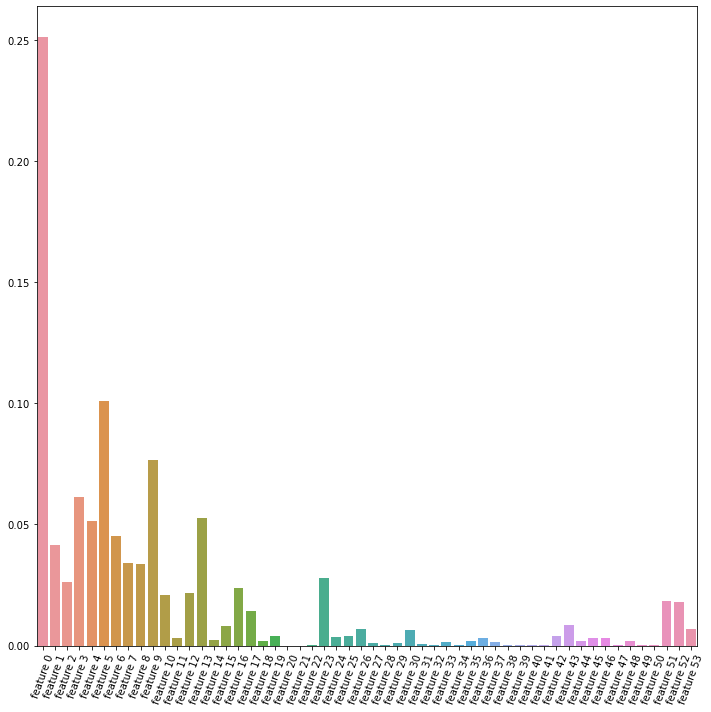

Fold 1
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     70825
           1       0.95      0.94      0.95      8939
           2       0.93      0.79      0.85       687
           3       0.94      0.74      0.83      2373
           4       0.95      0.84      0.89      4342
           5       0.98      0.94      0.96      5127

   micro avg       0.95      0.95      0.95     92293
   macro avg       0.95      0.87      0.91     92293
weighted avg       0.95      0.95      0.95     92293
 samples avg       0.61      0.61      0.61     92293




/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


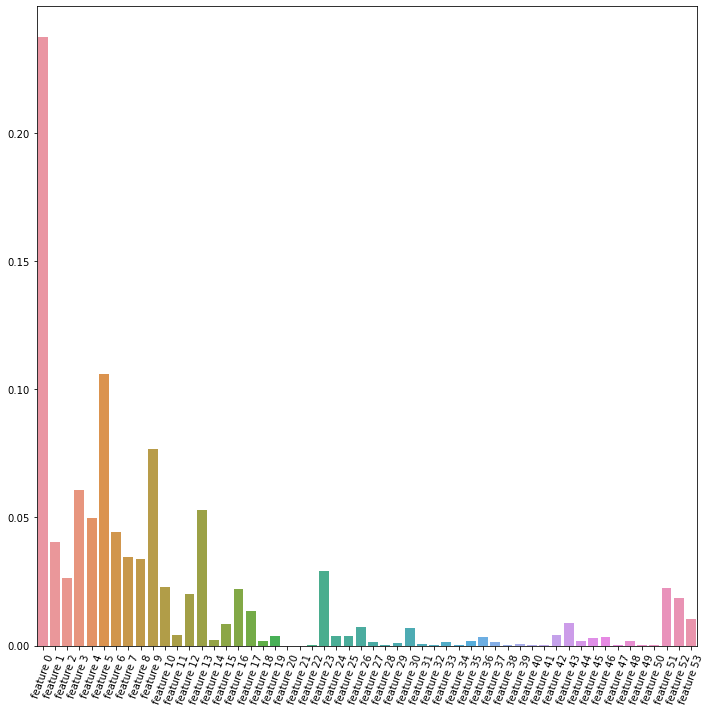

Fold 2
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     70825
           1       0.95      0.94      0.95      8938
           2       0.93      0.79      0.86       687
           3       0.94      0.76      0.84      2373
           4       0.95      0.85      0.90      4342
           5       0.97      0.94      0.96      5128

   micro avg       0.95      0.95      0.95     92293
   macro avg       0.95      0.87      0.91     92293
weighted avg       0.95      0.95      0.95     92293
 samples avg       0.61      0.61      0.61     92293




/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


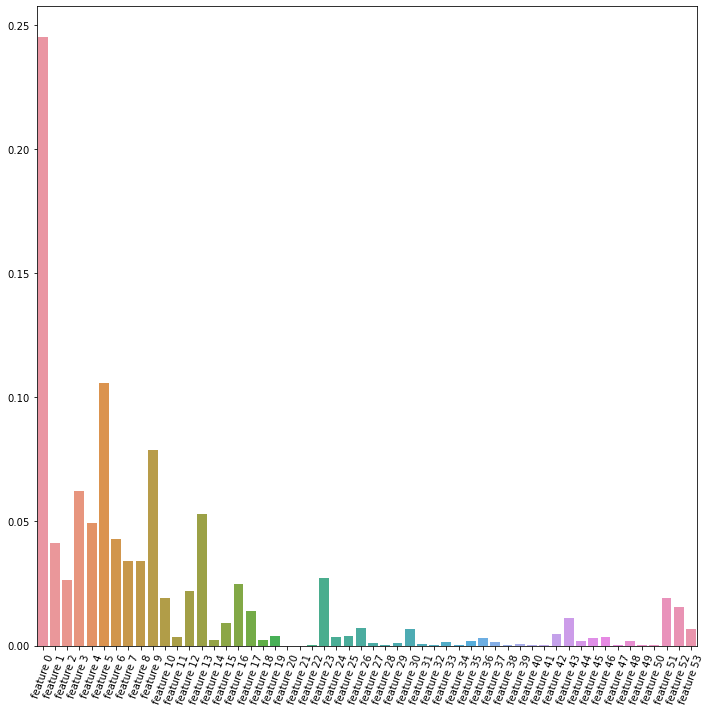

Fold 3
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     70825
           1       0.95      0.94      0.95      8939
           2       0.93      0.84      0.88       687
           3       0.95      0.74      0.83      2373
           4       0.95      0.84      0.89      4342
           5       0.98      0.94      0.96      5127

   micro avg       0.95      0.95      0.95     92293
   macro avg       0.95      0.88      0.91     92293
weighted avg       0.95      0.95      0.95     92293
 samples avg       0.61      0.61      0.61     92293




/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


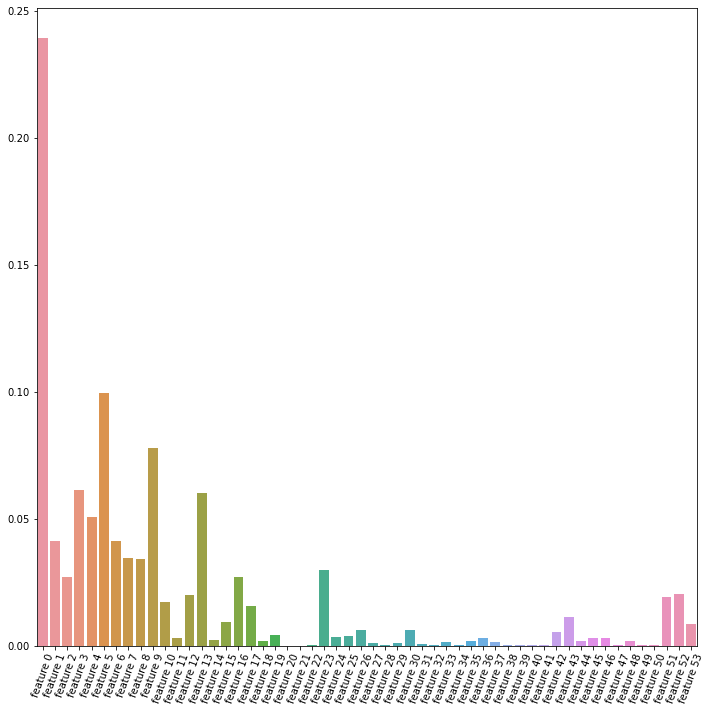

Fold 4
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     70825
           1       0.95      0.94      0.94      8938
           2       0.92      0.79      0.85       687
           3       0.95      0.73      0.83      2373
           4       0.95      0.83      0.89      4342
           5       0.98      0.94      0.96      5128

   micro avg       0.95      0.95      0.95     92293
   macro avg       0.95      0.87      0.90     92293
weighted avg       0.95      0.95      0.95     92293
 samples avg       0.61      0.61      0.61     92293




/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/asattiraju/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


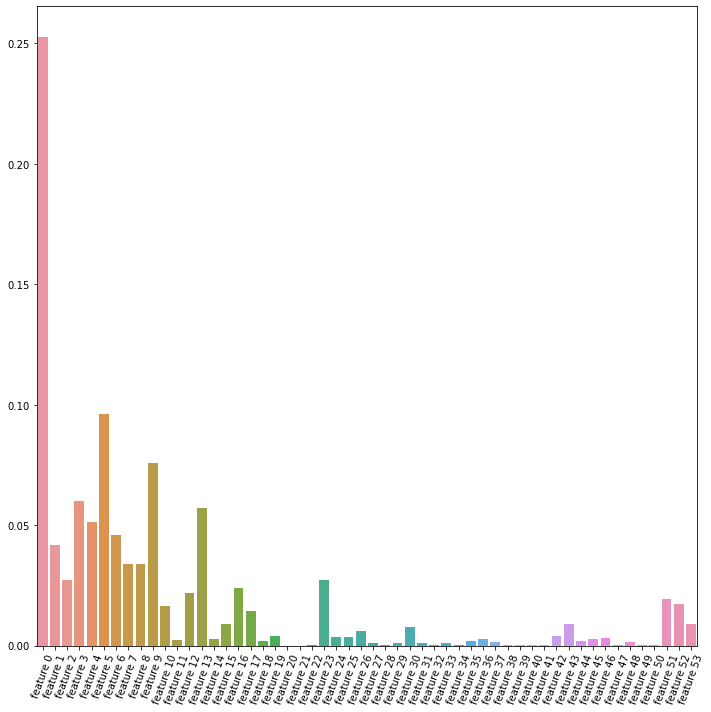

In [81]:
i = 0
y_pred_all = []
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    y_pred_all.append(y_pred)
    print("Fold " + str(i))
    print(classification_report(y_test, y_pred))
    
    print()
    
    importances = clf.feature_importances_
    feature_names = [f"feature {i}" for i in range(X.shape[1])]
    forest_importances = pd.Series(importances, index=feature_names)

    plt.figure(figsize=(10,10))
    sns.barplot(x = forest_importances.index, y = forest_importances.values)
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.show()

    i += 1
    

In [87]:
pd.concat([pd.DataFrame(feature_names),pd.DataFrame(X.columns)],axis=1)

,0,0
0,feature 0,Elevation
1,feature 1,Aspect
2,feature 2,Slope
3,feature 3,Horizontal_Distance_To_Hydrology
4,feature 4,Vertical_Distance_To_Hydrology
5,feature 5,Horizontal_Distance_To_Roadways
6,feature 6,Hillshade_9am
7,feature 7,Hillshade_Noon
8,feature 8,Hillshade_3pm
9,feature 9,Horizontal_Distance_To_Fire_Points
